<a href="https://colab.research.google.com/github/GuidoDinello/ModE/blob/main/EMalgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of the Expectation Maximization Algorithm


1. initialize the parameters
2. for each iteration:\
   2. 1. compute the posterior probability of each data point\
   2. 2. compute the expected value of each parameter\
   2. 3. compute the new value of each parameter\
   2. 4. compute the log-likelihood\
   2. 5. if the log-likelihood is not changing, stop
3. return the final parameters


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

In [2]:
def print_parameters(p,mu1,mu2,sigma1,sigma2):
    print('p = ', p,'\nmu1 = ', mu1, '\nmu2 = ', mu2, '\nsigma1 = ', sigma1, '\nsigma2 = ', sigma2)

In [3]:
def gaussian_bells_over_histplot(data, mu1, sigma1, mu2, sigma2):
    mu_min, mu_max = np.sort(np.array([mu1, mu2]))
    sigma = np.max(np.array([sigma1, sigma2]))
    x = np.linspace(mu_min - 3*sigma, mu_max + 3*sigma, 100)
    plt.hist(data, bins=100, density=True)
    plt.plot(x, norm.pdf(x, mu1, sigma1), label='mu1, sigma1')
    plt.plot(x, norm.pdf(x, mu2, sigma2), label='mu2, sigma2')
    plt.show()

In [6]:
from google.colab import files
uploaded = files.upload()
# construct a pandas data frame from a csv file
df = pd.read_csv('faithful.csv')
df.head()

Saving faithful.csv to faithful.csv


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


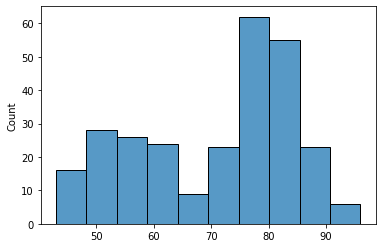

In [7]:
espera = df['waiting'].values
sn.histplot(espera)

p =  0.16244834357306126 
mu1 =  69.29637901673908 
mu2 =  80.75976029772596 
sigma1 =  8.76545967224636 
sigma2 =  5.080079900758013


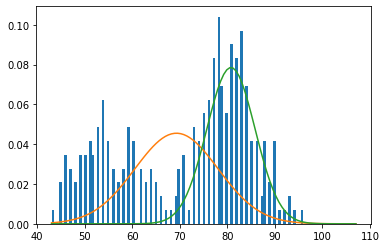

In [8]:
# intialize the parameters (p, mu1, mu2, sigma1, sigma2) randomly
p = np.random.uniform(0, 1)

min, max = espera.min(), espera.max()
mu1 = np.random.uniform(min, max)
mu2 = np.random.uniform(min, max)

sigma1 = (mu1-np.min(espera))/3
sigma2 = (np.max(espera)-mu2)/3

print_parameters(p, mu1, mu2, sigma1, sigma2)

gaussian_bells_over_histplot(espera, mu1, sigma1, mu2, sigma2)

In [9]:
# define an epsilon error
epsilon = 1e-5
log_likelihood_old = np.random.uniform(-3, -1)
for it in range(100):

    ## E-step
    # initialize the array for the posterior probabilities
    post = np.zeros(len(espera))
    for i in range(len(espera)):
        # calculate the posterior probabilities
        num = p * norm.pdf(espera[i], mu1, sigma1)
        den = (1-p) * norm.pdf(espera[i], mu2, sigma2)
        post[i] =  num / (num + den)
    

    ## M-step
    # compute the expected value of each parameter
    p_exp = np.mean(post)
    mu1_exp = np.average(espera, weights=post)
    mu2_exp = np.average(espera, weights=(1-post))
    sigma1_exp = np.sqrt(np.average((espera - mu1)**2, weights=post))
    sigma2_exp = np.sqrt(np.average((espera - mu2)**2, weights=(1-post)))
    
    
    # update the value of each parameter
    p = p_exp
    mu1 = mu1_exp
    mu2 = mu2_exp
    sigma1 = sigma1_exp
    sigma2 = sigma2_exp

    # compute the log-likelihood
    log_likelihood = np.sum(np.log(post))
    print('Iteration:', it, 'Log-likelihood:', log_likelihood)

    # if the log-likelihood is not changing, stop the loop
    if np.abs(log_likelihood - log_likelihood_old) < epsilon:
        break
    log_likelihood_old = log_likelihood



Iteration: 0 Log-likelihood: -463.01730096750543
Iteration: 1 Log-likelihood: -370.5400446430567
Iteration: 2 Log-likelihood: -428.3793281104379
Iteration: 3 Log-likelihood: -517.0891838362172
Iteration: 4 Log-likelihood: -625.130938770525
Iteration: 5 Log-likelihood: -755.9782806887476
Iteration: 6 Log-likelihood: -911.40558157707
Iteration: 7 Log-likelihood: -1084.2932349424766
Iteration: 8 Log-likelihood: -1256.382394552801
Iteration: 9 Log-likelihood: -1405.6589125199862
Iteration: 10 Log-likelihood: -1519.256837253794
Iteration: 11 Log-likelihood: -1598.0020094848753
Iteration: 12 Log-likelihood: -1650.0272117386805
Iteration: 13 Log-likelihood: -1683.8365793382154
Iteration: 14 Log-likelihood: -1705.7680575213394
Iteration: 15 Log-likelihood: -1720.033775405879
Iteration: 16 Log-likelihood: -1729.3434344478198
Iteration: 17 Log-likelihood: -1735.4347823261237
Iteration: 18 Log-likelihood: -1739.427875248359
Iteration: 19 Log-likelihood: -1742.0488559368816
Iteration: 20 Log-likel

p =  0.36088607434841197 
mu1 =  54.61485615919475 
mu2 =  80.0910694144992 
sigma1 =  5.87121942810518 
sigma2 =  5.86773441195615


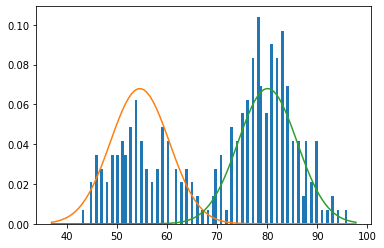

In [10]:
print_parameters(p,mu1,mu2,sigma1,sigma2)
gaussian_bells_over_histplot(espera, mu1, sigma1, mu2, sigma2)

Ahora hagamoslo en 2D

In [11]:
def print_parameters_2d(p, mu1x, mu1y, sigma1x, sigma1y, mu2x, mu2y, sigma2x, sigma2y):
    print('p = ', p)
    mu1 = np.array([mu1x, mu1y])
    print('mu1 = ', mu1)
    sigma1 = np.array([[sigma1x, 0], [0, sigma1y]])
    print('sigma1 = \n', sigma1)
    mu2 = np.array([mu2x, mu2y])
    print('mu2 = ', mu2)
    sigma2 = np.array([[sigma2x, 0], [0, sigma2y]])
    print('sigma2 = \n', sigma2)

In [12]:
def gaussian_level_curves(data, mus1, mus2, sigmas1, sigmas2):

    mus1 = (mus1 - data.mean()) / data.std()
    mus2 = (mus2 - data.mean()) / data.std()
    sigmas1 = [[(sigmas1[0][0] - data.mean()[0]) / data.std()[0], 0],[0, (sigmas1[1][1] - data.mean()[1]) / data.std()[1]]]
    sigmas2 = [[(sigmas2[0][0] - data.mean()[0]) / data.std()[0], 0],[0, (sigmas2[1][1] - data.mean()[1]) / data.std()[1]]]
    sigmas1 = np.abs(sigmas1)
    sigmas2 = np.abs(sigmas2)

    x_min1 = mus1[0] - 3*sigmas1[0][0]
    x_max1 = mus1[0] + 3*sigmas1[0][0]
    y_min1 = mus1[1] - 3*sigmas1[1][1]
    y_max1 = mus1[1] + 3*sigmas1[1][1]

    x_min2 = mus2[0] - 3*sigmas2[0][0]
    x_max2 = mus2[0] + 3*sigmas2[0][0]
    y_min2 = mus2[1] - 3*sigmas2[1][1]
    y_max2 = mus2[1] + 3*sigmas2[1][1]

    x_min = np.min([x_min1, x_min2])
    x_max = np.max([x_max1, x_max2])
    y_min = np.min([y_min1, y_min2])
    y_max = np.max([y_max1, y_max2])

    step_x = step_y = 0.1

    x, y = np.mgrid[x_min:x_max:step_x, y_min:y_max:step_y]

    grid = np.dstack((x, y))

    rv1 = multivariate_normal(mus1, sigmas1)
    rv2 = multivariate_normal(mus2, sigmas2)

    df_normalized = (data - data.mean()) / data.std()
    xs = df_normalized.iloc[:,0]
    ys = df_normalized.iloc[:,1]

    fig, ax = plt.subplots(1, 2, figsize=(13,5), dpi=100)

    s = ax[0].contourf(x, y, rv1.pdf(grid), levels=11, alpha=0.8, antialiased=True)
    ax[1].contourf(x, y, rv2.pdf(grid), levels=11, alpha=0.8, antialiased=True)

    sn.scatterplot(x=xs, y=ys, color='red', ax=ax[0])
    sn.scatterplot(x=xs, y=ys, color='red', ax=ax[1])

    ax[0].scatter(mus1[0], mus1[1], c='black', marker='x', s=20)
    ax[1].scatter(mus2[0], mus2[1], c='black', marker='x', s=20)

    ax[0].set_xlim((xs.min()-0.2, xs.max()+0.2))
    ax[1].set_xlim((xs.min()-0.2, xs.max()+0.2))
    ax[0].set_ylim((ys.min()-0.2, ys.max()+0.2))
    ax[1].set_ylim((ys.min()-0.2, ys.max()+0.2))

    fig.colorbar(s, ax=[ax[0],ax[1]])

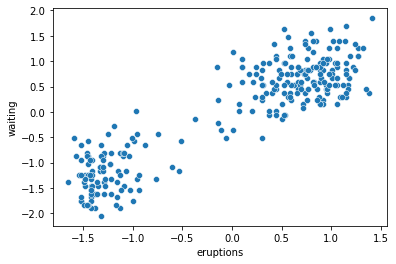

In [13]:
df_normalized = (df-df.mean())/df.std()
sn.scatterplot(data=df_normalized, x='eruptions', y='waiting')

In [14]:
# intialize the parameters (p, mu1x, mu1y, mu2x, mu2y, sigma1x, sigma1y, sigma2x, sigma2y) randomly
p = np.random.uniform(0, 1)

min_x, max_x = df['eruptions'].min(), df['eruptions'].max()
min_y, max_y = df['waiting'].min(), df['waiting'].max()
mu1x = np.random.uniform(min_x, max_x)
mu1y = np.random.uniform(min_y, max_y)
mu2x = np.random.uniform(min_x, max_x)
mu2y = np.random.uniform(min_y, max_y)

sigma1x = (mu1x-np.min(df['eruptions']))/3
sigma1y = (mu1y-np.min(df['waiting']))/3
sigma2x = (np.max(df['eruptions'])-mu2x)/3
sigma2y = (np.max(df['waiting'])-mu2y)/3

mus1 = np.array([mu1x, mu1y])
mus2 = np.array([mu2x, mu2y])
sigmas1 = np.array([[sigma1x, 0], [0, sigma1y]])
sigmas2 = np.array([[sigma2x, 0], [0, sigma2y]])

# assert sigmas are positive semidefinite
sigmas1 = np.dot(sigmas1, sigmas1.T)
sigmas2 = np.dot(sigmas2, sigmas2.T)

print_parameters_2d(p, mu1x, mu1y, sigma1x, sigma1y, mu2x, mu2y, sigma2x, sigma2y)

p =  0.10119142875961884
mu1 =  [ 2.91383795 63.32632614]
sigma1 = 
 [[0.43794598 0.        ]
 [0.         6.77544205]]
mu2 =  [ 2.37783766 64.23566121]
sigma2 = 
 [[ 0.90738745  0.        ]
 [ 0.         10.58811293]]


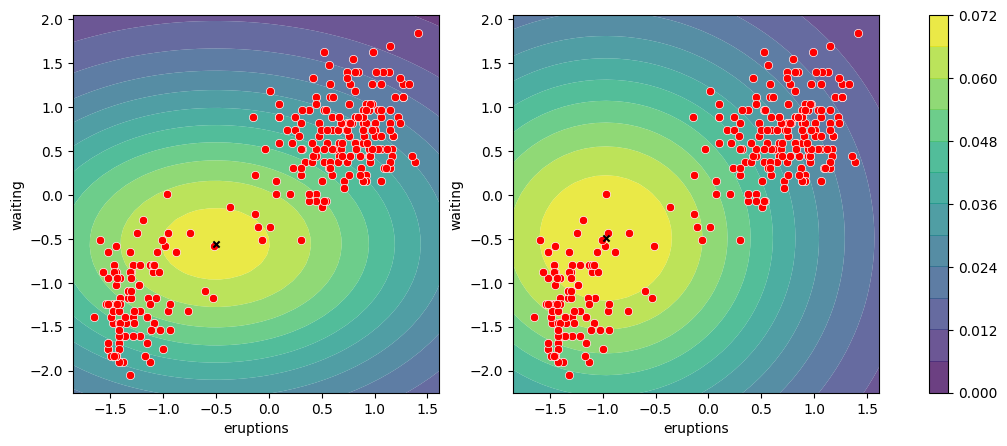

In [15]:
gaussian_level_curves(df, mus1, mus2, sigmas1, sigmas2)

In [16]:
eps=1e-8
# define the number of clusters to be learned
k = 2
# create and initialize the cluster centers and the weight paramters
weights = np.array([p, 1-p])
means = np.array([mus1, mus2])
cov = np.array([sigmas1, sigmas2])
X = df.values

# run GMM for 40 steps
for step in range(40):

  likelihood = []
  # Expectation step
  for j in range(k):
    likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j]))
  likelihood = np.array(likelihood)
  assert likelihood.shape == (k, len(X))
    
  b = []
  # Maximization step 
  for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

    # updagte mean and variance
    means[j] = np.sum(b[j].reshape(len(X),1) * X, axis=0) / (np.sum(b[j]+eps))
    cov[j] = np.dot((b[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)

    # update the weights
    weights[j] = np.mean(b[j])
    
    assert cov.shape == (k, X.shape[1], X.shape[1])
    assert means.shape == (k, X.shape[1])

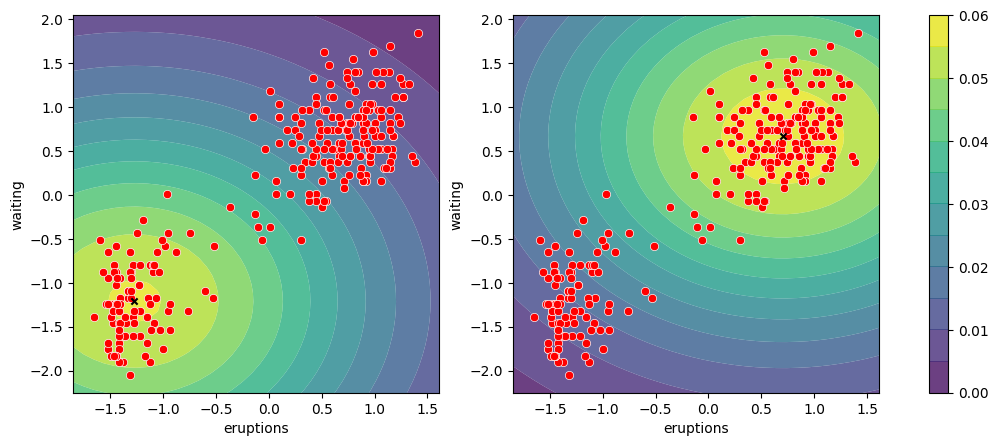

In [17]:
gaussian_level_curves(df, means[0], means[1], cov[0], cov[1])

# Using the library function

In [18]:
# estimate the parameters of the mixture of two gaussians using Gaussian Mixture
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(df)

GaussianMixture(n_components=2)

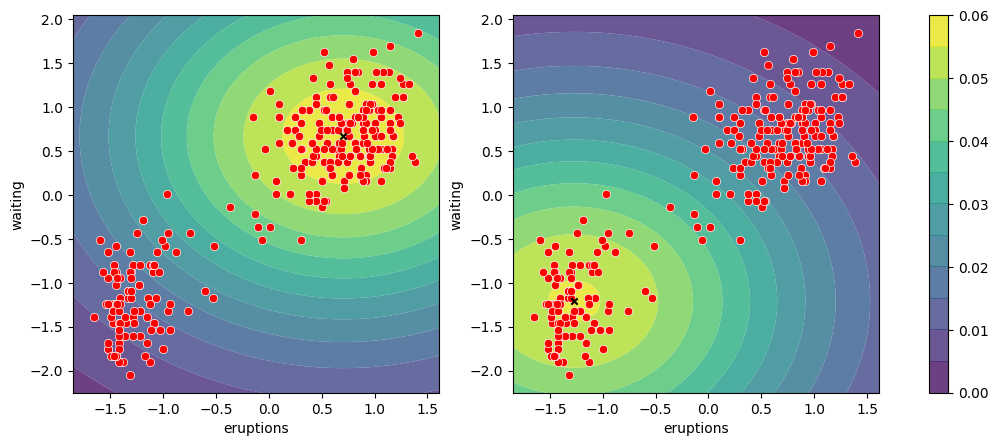

In [19]:
gaussian_level_curves(df, gmm.means_[0], gmm.means_[1], gmm.covariances_[0], gmm.covariances_[1])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"


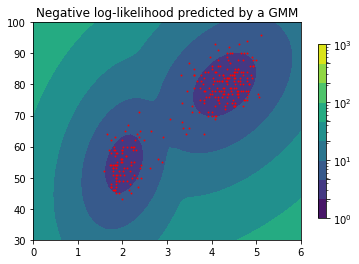

In [20]:
from matplotlib.colors import LogNorm
from sklearn import mixture

e = df.iloc[:, 0]
w = df.iloc[:, 1]

# display predicted scores by the model as a contour plot
x = np.linspace(0.0, 6.0)
y = np.linspace(30.0, 100.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contourf(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(e, w, .8, color='red')

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

In [27]:
means

array([[ 2.03638706, 54.47850498],
       [ 4.28966232, 79.96811618]])

In [22]:
gmm.means_

array([[ 4.28977944, 79.96953298],
       [ 2.03652149, 54.47986018]])

In [26]:
cov

array([[[ 0.06916669,  0.43516246],
        [ 0.43516246, 33.69722664]],

       [[ 0.16996797,  0.94060484],
        [ 0.94060484, 36.0461248 ]]])

In [31]:
gmm.covariances_

array([[[ 0.16982046,  0.93871793],
        [ 0.93871793, 36.02497019]],

       [[ 0.06927449,  0.43627723],
        [ 0.43627723, 33.70493352]]])